1 Homework Review


We reviewed group 4 and group 17 during Q&A with Reem Farah.

2 DQN

We implemented DQN using the discrete version of LunarLander instead of Atari Breakout because of our limited compute resources. While we implemented the necessary components described by the assignment, including the use of a dealyed target network, prefilling data, and Double DQN using Leon's base implementation presented in the YouTube tutorial series, we were unable to achieve winning performance.

We have some thought about why this is, and have included it and some illustrations of our 'best' results here for review.

2.1 Our results

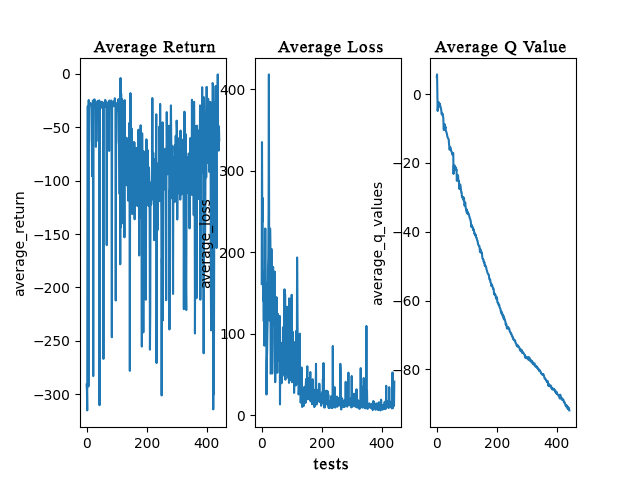

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/results_5000episodes.png', cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

Above we plot the average returns, losses, and Q values for test runs of our implementation after every 10 steps of training, with 5000 overall episodes. Here, we see that the performance is fairly unstable, but does start to converge just below 0 reward. We clearly see that the average losses are decreasing, indicating the the network is doing something to minimize loss, but our agent is not actually learning to land.

We also tried this with a few different reasonable levels for different parameters, including: parallel game unrolls, unroll_steps, target-training model weighting, and learning rate. We achieved the same qualitative pattern, where the loss decreased while the average reward converged to about zero.

We used a few methods to try to understand the problem better. First, we checked whether the agent ever successfully achieved a win state, either during exploration or later in training when it was more on-policy. We found that the agent never landed safetly, even by chance, which may explain why our model's average returns converge below zero. Since the agent never encounters the winstate, its doe not know it exists and thus it will not be reflected in its policy.

Below are two videos of the lunar lander before training, and after the first 150 episodes of training. We see that, without training, the lander quickly crashes and ends the episode. After just a small amount of training, the lander had learned to instead fly upwards away from the moon. This behavior is consistent when we render multiple test plays. Of course, this is a great way to avoid crashing, but does prevent the lander from discovering the high reward associated with landing.

We tried a few things to allow the lander to encounter winstates early in training, unfortunately without success. This starting with a high epsilon to increase exploration (with eventual epsilon decay) and adding more prefilling with pure exploration.

Due to limited time, we have not yet resolved this issue, but hope to discover a good solution after consulting with our peer-review groups.

In [ ]:
from visualizer import play

In [ ]:
play('./videos/rl-video-episode-0.mp4')

In [ ]:
play('./videos/rl-video-episode-9.mp4')